In [2]:
import cv2
import numpy as np

img = cv2.imread('solar_farm_25_0_rgb.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)
minLineLength = 1000
maxLineGap = 10
lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength,maxLineGap)
for x1,y1,x2,y2 in lines[0]:
    cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)

cv2.imwrite('houghlines5.jpg',img)

True

# approach 2 

In [41]:
#http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_sift_intro/py_sift_intro.html

import cv2
import numpy as np

img = cv2.imread('solar_farm_25_0_rgb.jpg')
gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

sift = cv2.xfeatures2d.SIFT_create()
kp = sift.detect(gray,None)

img=cv2.drawKeypoints(gray,kp,flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
cv2.imwrite('sift_keypoints1.jpg',img)




TypeError: Required argument 'outImage' (pos 3) not found

# approach 3

In [20]:
import cv2 
import numpy as np

templateImage = cv2.imread('solar_farm_25_0_rgb.jpg',0)
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)


w, h = templateImage.shape[:2]

res = cv2.matchTemplate(img_gray,templateImage,cv2.TM_CCOEFF_NORMED)
threshold = 0.7
loc = np.where( res >= threshold)

for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,255,255), 2)

cv2.imwrite('out.png',img_rgb)

True

# approach 4

In [35]:
import cv2
import numpy as np
MIN_MATCH_COUNT=30

detector= cv2.xfeatures2d.SIFT_create()

FLANN_INDEX_KDITREE=0
flannParam=dict(algorithm=FLANN_INDEX_KDITREE,tree=5)
flann=cv2.FlannBasedMatcher(flannParam,{})

trainImg=cv2.imread("Trainimg.jpg",0)
trainKP,trainDesc=detector.detectAndCompute(trainImg,None)

QueryImgBGR=cv2.imread('solar_farm_25_0_rgb.jpg',0)
QueryImg=cv2.cvtColor(QueryImgBGR,cv2.COLOR_BGR2GRAY)
queryKP,queryDesc=detector.detectAndCompute(QueryImg,None)
matches=flann.knnMatch(queryDesc,trainDesc,k=2)

goodMatch=[]
for m,n in matches:
    if(m.distance < 0.75*n.distance):
        goodMatch.append(m)
    if(len(goodMatch)> MIN_MATCH_COUNT):
        tp=[]
        qp=[]
        for m in goodMatch:
            tp.append(trainKP[m.trainIdx].pt)
            qp.append(queryKP[m.queryIdx].pt)
        tp,qp=np.float32((tp,qp))
        H,status=cv2.findHomography(tp,qp,cv2.RANSAC,3.0)
        h,w=trainImg.shape
        trainBorder=np.float32([[[0,0],[0,h-1],[w-1,h-1],[w-1,0]]])
        queryBorder=cv2.perspectiveTransform(trainBorder,H)
        cv2.polylines(QueryImgBGR,[np.int32(queryBorder)],True,(0,255,0),5)
        cv2.imshow('result',QueryImgBGR)
    

error: C:\projects\opencv-python\opencv\modules\imgproc\src\color.cpp:11111: error: (-215) scn == 3 || scn == 4 in function cv::cvtColor


# approach 5

In [4]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt

print ('OpenCV Version (should be 3.1.0, with nonfree packages installed, for this tutorial):')
print (cv2.__version__)

# I cropped out each stereo image into its own file.
# You'll have to download the images to run this for yourself
octo_front = cv2.imread('solar_farm_25_0_rgb.jpg')
octo_offset = cv2.imread('solar_farm_19_0_rgb.jpg')

def show_rgb_img(img):
    """Convenience function to display a typical color image"""
    return plt.imshow(cv2.cvtColor(img, cv2.CV_32S))

OpenCV Version (should be 3.1.0, with nonfree packages installed, for this tutorial):
3.4.0


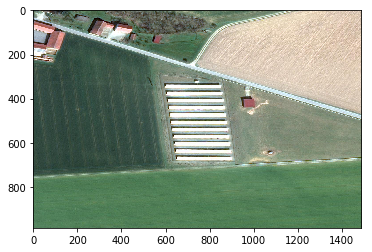

In [5]:
show_rgb_img(octo_front)

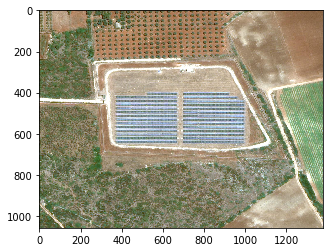

In [6]:
show_rgb_img(octo_offset)

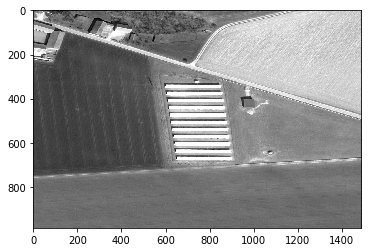

In [7]:
def to_gray(color_img):
    gray = cv2.cvtColor(color_img, cv2.COLOR_BGR2GRAY)
    return gray

octo_front_gray = to_gray(octo_front)
octo_offset_gray = to_gray(octo_offset)

plt.imshow(octo_front_gray, cmap='gray');

Here are what our SIFT features look like for the front-view octopus image:


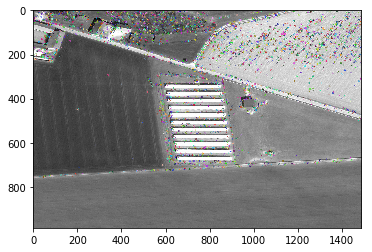

In [9]:
def gen_sift_features(gray_img):
    #sift = cv2.SIFT()
    sift = cv2.xfeatures2d.SIFT_create()
    # kp is the keypoints
    #
    # desc is the SIFT descriptors, they're 128-dimensional vectors
    # that we can use for our final features
    kp, desc = sift.detectAndCompute(gray_img, None)
    return kp, desc

def show_sift_features(gray_img, color_img, kp):
    return plt.imshow(cv2.drawKeypoints(gray_img, kp, color_img.copy()))

# generate SIFT keypoints and descriptors
octo_front_kp, octo_front_desc = gen_sift_features(octo_front_gray)
octo_offset_kp, octo_offset_desc = gen_sift_features(octo_offset_gray)

print ('Here are what our SIFT features look like for the front-view octopus image:')
show_sift_features(octo_front_gray, octo_front, octo_front_kp);

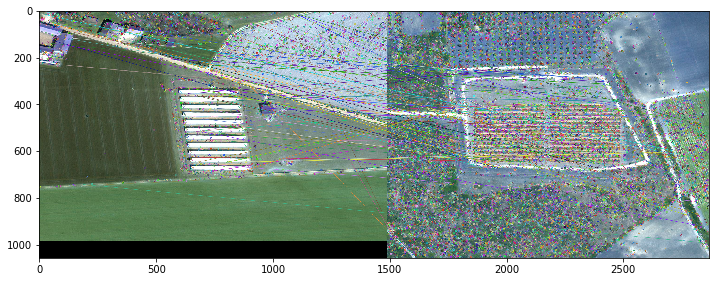

In [10]:
# create a BFMatcher object which will match up the SIFT features
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)

matches = bf.match(octo_front_desc, octo_offset_desc)

# Sort the matches in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# draw the top N matches
N_MATCHES = 100

match_img = cv2.drawMatches(
    octo_front, octo_front_kp,
    octo_offset, octo_offset_kp,
    matches[:N_MATCHES], octo_offset.copy(), flags=0)

plt.figure(figsize=(12,6))
plt.imshow(match_img);

# approach 6

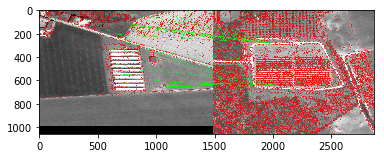

(<matplotlib.image.AxesImage at 0x904bb5ef0>, None)

In [36]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img1 = cv2.imread('solar_farm_25_0_rgb.jpg',0)          # queryImage
img2 = cv2.imread('solar_farm_19_0_rgb.jpg',0) # trainImage

# Initiate SIFT detector
sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

# FLANN parameters
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)   # or pass empty dictionary

flann = cv2.FlannBasedMatcher(index_params,search_params)

matches = flann.knnMatch(des1,des2,k=2)

# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]

# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.7*n.distance:
        matchesMask[i]=[1,0]

draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = 0)

img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2,matches,None,**draw_params)

plt.imshow(img3,),plt.show()